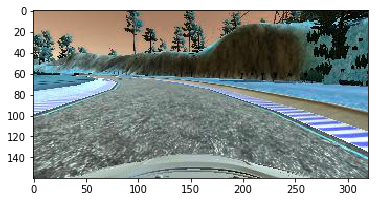

In [1]:
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""
images = []
measurements = []
col = img_data.shape[0]
img_data = pd.read_csv('driving_log.csv')
mea = img_data.iloc[0:1223,3:7]
img = img_data.iloc[0:1223,0:3]

for line in img:
    source_path = img.iloc[0,0]
    filename = source_path.split('/')[-1]
    current_path = filename
    image = cv2.imread(current_path)
    images.append(image)

plt.imshow(images[0])

"""
lines = []
meaurements = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []

for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    image = cv2.imread(filename)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)

augment_images, augmented_measurements = [],[]
for image,measurement in zip(images, measurements):
    augment_images.append(image)
    augmented_measurements.append(measurement)
    augment_images.append(cv2.flip(image,1))
    augmented_measurements.append(measurement*-1.0)

plt.imshow(images[-1])



In [2]:
X_train = np.array(augment_images)
y_train = np.array(augmented_measurements)

print(X_train.shape)

(19972, 160, 320, 3)


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense,Lambda
from keras.layers import Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160, 320, 3)))
model.add(Cropping2D(cropping=((50,20),(0,0))))
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

print('model ready')

model.compile(loss = 'mse',optimizer = 'adam')
model.fit(X_train, y_train, validation_split = 0.2, shuffle = True, nb_epoch = 10)

model.save('model.h5')

C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), strides=(2, 2), activation="relu")`
  after removing the cwd from sys.path.
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), strides=(2, 2), activation="relu")`
  """
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), strides=(2, 2), activation="relu")`
  
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
C:\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\Anaconda3\envs\carnd-ter

model ready
Train on 15977 samples, validate on 3995 samples
Epoch 1/15
15977/15977 [==============================] - 22s 1ms/step - loss: 0.0145 - val_loss: 0.0578
Epoch 2/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0129 - val_loss: 0.0549
Epoch 3/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0123 - val_loss: 0.0559
Epoch 4/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0120 - val_loss: 0.0556
Epoch 5/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0118 - val_loss: 0.0558
Epoch 6/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0113 - val_loss: 0.0554
Epoch 7/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0108 - val_loss: 0.0554
Epoch 8/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0101 - val_loss: 0.0549
Epoch 9/15
15977/15977 [==============================] - 20s 1ms/step - loss: 0.0093 - val_loss: 0